# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Fila Sofiyati
- **Email:** filasofiyati19@students.unnes.ac.id
- **ID Dicoding:** fila_sofiyati

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penyewaan sepeda selama beberapa bulan terakhir?

2. Faktor apa yang paling mempengaruhi dan tidak mempengaruhi penyewaan sepeda?

3. Kapan penyewa terakhir menyewa sepeda, seberapa sering dan berapa banyak uang yang dihabiskan penyewa?

## Import Semua Packages/Library yang Digunakan

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

**Hour**

In [302]:
hour_data = pd.read_csv("hour.csv")
print(hour_data)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

Pada data hour terdapat 17379 baris dan 17 kolom.

In [303]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Day**

In [304]:
day_data = pd.read_csv("day.csv")
print(day_data)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

Pada data day terdapat 731 baris dan 16 kolom.

Detail kolom untuk data hours dan data day (untuk data day tidak ada kolom jam (hr))
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :

	1. Clear, Few clouds, Partly cloudy, Partly cloudy
	2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [305]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

**Hour**

In [306]:
#Melihat tipe data pada data hour
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [307]:
# Melihat missing value di data hour
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data hour tidak memiliki missing value.

In [308]:
# melihat nilai duplikat pada data hour
print("Jumlah duplikat data hour: ", hour_data.duplicated().sum())

Jumlah duplikat data hour:  0


In [309]:
# melihat nilai unique dalam data hour
for col in hour_data.columns:
    print('jumlah nilai unique dari {} sebanyak {}.'.format(col, hour_data[col].nunique()))

jumlah nilai unique dari instant sebanyak 17379.
jumlah nilai unique dari dteday sebanyak 731.
jumlah nilai unique dari season sebanyak 4.
jumlah nilai unique dari yr sebanyak 2.
jumlah nilai unique dari mnth sebanyak 12.
jumlah nilai unique dari hr sebanyak 24.
jumlah nilai unique dari holiday sebanyak 2.
jumlah nilai unique dari weekday sebanyak 7.
jumlah nilai unique dari workingday sebanyak 2.
jumlah nilai unique dari weathersit sebanyak 4.
jumlah nilai unique dari temp sebanyak 50.
jumlah nilai unique dari atemp sebanyak 65.
jumlah nilai unique dari hum sebanyak 89.
jumlah nilai unique dari windspeed sebanyak 30.
jumlah nilai unique dari casual sebanyak 322.
jumlah nilai unique dari registered sebanyak 776.
jumlah nilai unique dari cnt sebanyak 869.


In [310]:
# Statistika deskriptif pada data hour
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Mayoritas dataset memiliki nilai Mean < Median, artinya distribusi data cenderung positively-skewed.

**Day**

In [311]:
# Melihat tipe data pada data day
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [312]:
# Melihat missing value pada data day
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data day tidak memiliki missing value.

In [313]:
# Melihat nilai duplikat pada data day
print("Jumlah duplikat data day: ", day_data.duplicated().sum())

Jumlah duplikat data day:  0


In [314]:
# melihat nilai unique dalam data day
for col in day_data.columns:
    print('jumlah nilai unique dari {} sebanyak {}.'.format(col, day_data[col].nunique()))

jumlah nilai unique dari instant sebanyak 731.
jumlah nilai unique dari dteday sebanyak 731.
jumlah nilai unique dari season sebanyak 4.
jumlah nilai unique dari yr sebanyak 2.
jumlah nilai unique dari mnth sebanyak 12.
jumlah nilai unique dari holiday sebanyak 2.
jumlah nilai unique dari weekday sebanyak 7.
jumlah nilai unique dari workingday sebanyak 2.
jumlah nilai unique dari weathersit sebanyak 3.
jumlah nilai unique dari temp sebanyak 499.
jumlah nilai unique dari atemp sebanyak 690.
jumlah nilai unique dari hum sebanyak 595.
jumlah nilai unique dari windspeed sebanyak 650.
jumlah nilai unique dari casual sebanyak 606.
jumlah nilai unique dari registered sebanyak 679.
jumlah nilai unique dari cnt sebanyak 696.


In [315]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Mayoritas dataset memiliki nilai Mean < Median, artinya distribusi data cenderung positively-skewed.

### Cleaning Data

**Baik Data hour maupun Data day tidak memuat missing value dan duplikasi data, jadi tidak perlu menangani missing value dan menangani duplikat data.**

**Kemudian fitur - fitur dalam data ini juga sudah dilakukan encoding.**


Selanjutnya disini akan dilihat apakah dalam data hour dan data day ada inaccurate value.

In [316]:
print(hour_data.min())

instant                1
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
hr                     0
holiday                0
weekday                0
workingday             0
weathersit             1
temp                0.02
atemp                0.0
hum                  0.0
windspeed            0.0
casual                 0
registered             0
cnt                    1
dtype: object


In [317]:
print(hour_data.max())

instant            17379
dteday        2012-12-31
season                 4
yr                     1
mnth                  12
hr                    23
holiday                1
weekday                6
workingday             1
weathersit             4
temp                 1.0
atemp                1.0
hum                  1.0
windspeed         0.8507
casual               367
registered           886
cnt                  977
dtype: object


Terlihat pada data hour, semua nilainya normal dan tidak ada inaccurate value.

In [318]:
print(day_data.min())

instant                1
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
holiday                0
weekday                0
workingday             0
weathersit             1
temp             0.05913
atemp            0.07907
hum                  0.0
windspeed       0.022392
casual                 2
registered            20
cnt                   22
dtype: object


In [319]:
print(day_data.max())

instant              731
dteday        2012-12-31
season                 4
yr                     1
mnth                  12
holiday                1
weekday                6
workingday             1
weathersit             3
temp            0.861667
atemp           0.840896
hum               0.9725
windspeed       0.507463
casual              3410
registered          6946
cnt                 8714
dtype: object


Terlihat pada data day, semua nilainya normal dan tidak ada inaccurate value.

# Exploratory Data Analysis (EDA)

## Exploratory Data Hour

In [320]:
hour_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan data yang ditampilkan, terlihat statistik informasi dari data hour penyewaan sepeda, dengan rata - rata 11,546752 jam, dengan penyewaan terlama mencapai 23 jam dan penyewaan paling sebentar tidak mencapai 1 jam (0 jam) dan standar deviasinya yaitu 6,914405 jam.

Disini bisa dilihat beberapa kolom yang akan dilakukan exploratory analysis hour yaitu kolom season, weathersit, month, weekday, workingday.

Selanjutnya, akan dilihat demografi sewa sepeda berdasarkan musim (season) pada data hour.

In [321]:
hour_data.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    4496
2    4409
1    4242
4    4232
Name: instant, dtype: int64

season : season (1:springer, 2:summer, 3:fall, 4:winter).
Terlihat paling banyak penyewaan sepeda pada musim gugur (fall) sebanyak 4496 jam dan paling sedikit pada musim dingin (winter) sebanyak 4232 jam.
Musim (season) cukup berpengaruh dalam penyewaan sepeda harian.

Selanjutnya, akan dilihat demografi sewa sepeda berdasarkan kondisi cuaca(weathersit) pada data hour.

In [322]:
hour_data.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

weathersit :

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2.  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
    
Terlihat penyewaan sepeda paling banyak saat kondisi cuaca (weathersit) 1 sebanyak 11413 jam dan paling sedikit saat kondisi cuaca (weathersit 4) sebanyak 3 jam.
weathersit sangat berpengaruh pada penyewaan sepeda harian.

Selanjutnya, akan dilihat demografi sewa sepeda berdasarkan bulan (mnth) pada data hour.

In [323]:
hour_data.groupby(by="mnth").instant.nunique().sort_values(ascending=False)

mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: instant, dtype: int64

Terlihat penyewaan sepeda paling banyak saat bulan mei dan juli sebanyak 1488 jam dan paling sedikit saat bulan febuari sebanyak 1341 jam.
Bulan (month) cukup berpengaruh dalam penyewaan sepeda harian  (hour).

Selanjutnya, akan dilihat demografi sewa sepeda berdasarkan weekday pada data hour.

In [324]:
hour_data.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: instant, dtype: int64

Terlihat bahwa penyewaan sepeda terbanyak pada hari ke 6 (minggu) sebanyak 2512 jam dan yang plaing sedikit pada hari ke 2 (rabu) sebanyak 2453 jam.

Selanjutnya, akan dilihat demografi sewa sepeda berdasarkan workingday pada data hour.

In [325]:
hour_data.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
1    11865
0     5514
Name: instant, dtype: int64

Penyewaan sepeda per jam paling banyak terjadi pada working day, karena dalam seminggu working day merupakan paling banyak.

**Demografi Data hour pada kolom month dan year**

disini digrupkan antara kolom month dan year.

In [326]:
# Konversi kolom 'dteday' menjadi tipe data datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Buat kolom baru untuk tahun dan bulan
hour_data['yr'] = hour_data['dteday'].dt.year
hour_data['mnth'] = hour_data['dteday'].dt.month

# Group by tahun dan bulan, dan hitung jumlah penyewaan (jam)
result_hr = hour_data.groupby(['yr', 'mnth']).agg({'hr': 'count'}).reset_index()

print(result_hr)

      yr  mnth   hr
0   2011     1  688
1   2011     2  649
2   2011     3  730
3   2011     4  719
4   2011     5  744
5   2011     6  720
6   2011     7  744
7   2011     8  731
8   2011     9  717
9   2011    10  743
10  2011    11  719
11  2011    12  741
12  2012     1  741
13  2012     2  692
14  2012     3  743
15  2012     4  718
16  2012     5  744
17  2012     6  720
18  2012     7  744
19  2012     8  744
20  2012     9  720
21  2012    10  708
22  2012    11  718
23  2012    12  742


Terlihat bahawa penyewaan sepeda paling sedikit pada bulan febuari 2011, hanya sebanyak 649 jam dan yang paling banyak sebanyak 744 jam, di beberapa bulan.

Pada penyewaan sepeda per jam di setiap bulan (month) baik tahun 2011 dan 2012 terlihat hal ini cukup berpengaruh.

## Exploratory Data Day

In [327]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Disini bisa dilihat beberapa kolom yang akan dilakukan exploratory analysis day yaitu kolom season, weathersit, month, weekday, workingday.

Selanjutnya, akan dilihat demografi sewa sepeda berdasarkan musim (season) pada data day.

In [328]:
day_data.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

season : season (1:springer, 2:summer, 3:fall, 4:winter). Terlihat paling banyak penyewaan sepeda pada musim gugur (fall) sebanyak 188 hari dan paling sedikit pada musim dingin (winter) sebanyak 178 hari.
musim (season) tidak terlalu berpengaruh dignifikan dalam penyewaan sepeda harian.

Selanjutnya, akan dilihat demografi sewa sepeda berdasarkan kondisi cuaca (weathersit) pada data hour.

In [329]:
day_data.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

weathersit :

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2.  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
    
Terlihat penyewaan sepeda paling banyak saat kondisi cuaca (weathersit) 1 sebanyak 463 hari dan paling sedikit saat kondisi cuaca (weathersit 3) karena tidak ada penyewaah sepeda pada cuaca tersebut.
weathersit sangat berpengaruh pada penyewaan harian sepeda.

Selanjutnya, akan dilihat demografi sewa sepeda berdasarkan musim (season) pada data weathersit.

In [330]:
day_data.groupby(by="mnth").instant.nunique().sort_values(ascending=False)

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: instant, dtype: int64

Terlihat bahwa bulan tidak terlalu berpengaruh terhadap penyewaan sepeda harian, ini bergantung pada banyak hari di bulan tersebut.

In [331]:
day_data.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

weekday tidak terlalu berpengaruh pada penyewaan sepeda harian.

Selanjutnya, akan dilihat demografi sewa sepeda berdasarkan working day pada data day.

In [332]:
day_data.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

workingday
1    500
0    231
Name: instant, dtype: int64

Penyewaan sepeda per hari paling banyak terjadi pada working day, karena dalam seminggu working day merupakan hari paling banyak.

**Demografi mont dan year pada data day dan kolom pelanggan**

Disini akan dilihat EDA dari kolom yr, mnth,dan dari kolom pelnggan registered casual cnt.

In [333]:
# Konversi kolom 'dteday' menjadi tipe data datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Buat kolom baru untuk tahun dan bulan
day_data['yr'] = day_data['dteday'].dt.year
day_data['mnth'] = day_data['dteday'].dt.month

# Group by tahun dan bulan, dan hitung jumlah penyewaan
result_day_usr = day_data.groupby(['yr', 'mnth']).agg({
    'registered': 'sum',
    'casual': 'sum',
    'cnt': 'sum'
}).reset_index()

print(result_day_usr)

      yr  mnth  registered  casual     cnt
0   2011     1       35116    3073   38189
1   2011     2       41973    6242   48215
2   2011     3       51219   12826   64045
3   2011     4       72524   22346   94870
4   2011     5      104771   31050  135821
5   2011     6      112900   30612  143512
6   2011     7      104889   36452  141341
7   2011     8      107849   28842  136691
8   2011     9      100873   26545  127418
9   2011    10       98289   25222  123511
10  2011    11       86573   15594  102167
11  2011    12       78875    8448   87323
12  2012     1       87775    8969   96744
13  2012     2       94416    8721  103137
14  2012     3      133257   31618  164875
15  2012     4      135768   38456  174224
16  2012     5      151630   44235  195865
17  2012     6      159536   43294  202830
18  2012     7      161902   41705  203607
19  2012     8      171306   43197  214503
20  2012     9      174795   43778  218573
21  2012    10      164303   34538  198841
22  2012   

Bisa dilihat penyewaan sepeda oleh pelanggan Bulan 9 2012 paling tinggi, paling rendah januari 2011.

## Visualization & Explanatory Analysis

### 1. Bagaimana performa penyewaan sepeda selama beberapa bulan terakhir?

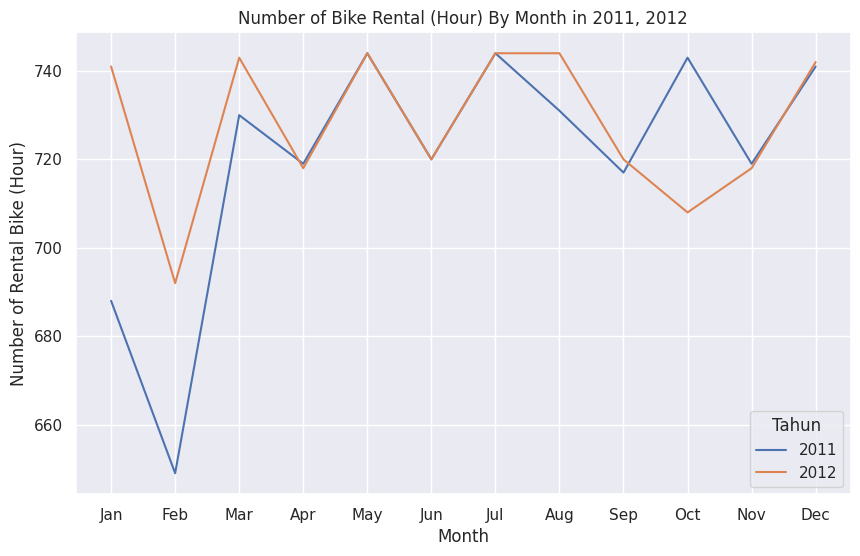

In [334]:
plt.figure(figsize=(10, 6))
for year in result_hr['yr'].unique():
    year_data = result_hr[result_hr['yr'] == year]
    plt.plot(year_data['mnth'], year_data['hr'], label=year)

plt.title('Number of Bike Rental (Hour) By Month in 2011, 2012')
plt.xlabel('Month')
plt.ylabel('Number of Rental Bike (Hour)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Tahun')
plt.grid(True)
plt.show()

Disini bisa dilihat visualisasi berapa jumlah pelanggan yang melakukan rental per jam baik pelanggan register, casual atau gabungan keduanya (cnt) pada Data Hour.

Visualisasi EDA Data Day pada kolom yr, mnth, registered, casual, cnt dan hr.

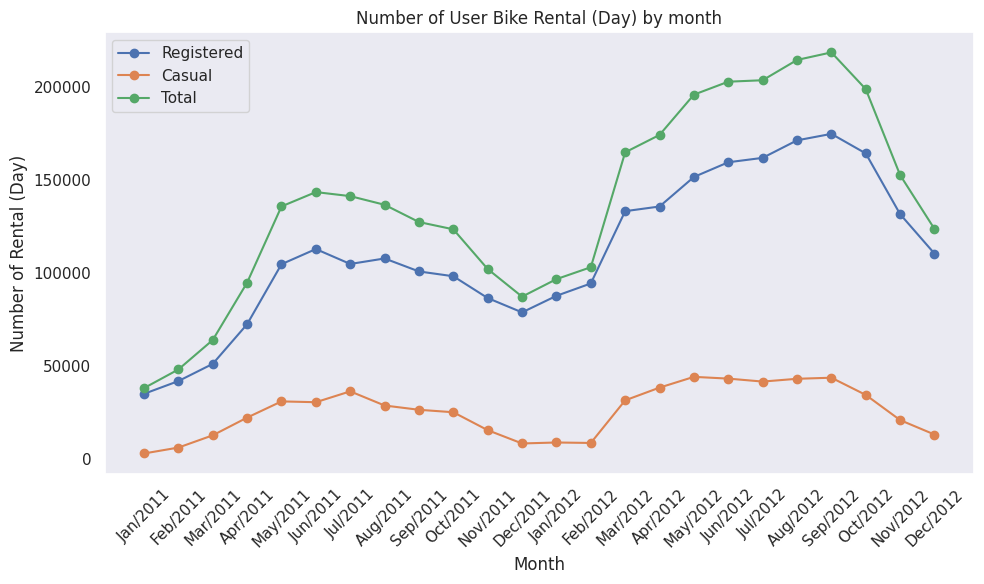

In [335]:
# Ubah nomor bulan menjadi nama bulan
result_day_usr['mnth'] = result_day_usr['mnth'].apply(lambda x: calendar.month_abbr[x])

# Buat diagram garis untuk jumlah penyewaan terdaftar, non-terdaftar, dan total
plt.figure(figsize=(10, 6))

plt.plot(result_day_usr.index, result_day_usr['registered'], label='Registered', marker='o')
plt.plot(result_day_usr.index, result_day_usr['casual'], label='Casual', marker='o')
plt.plot(result_day_usr.index, result_day_usr['cnt'], label='Total', marker='o')

plt.title('Number of User Bike Rental (Day) by month')
plt.xlabel('Month')
plt.ylabel('Number of Rental (Day)')
plt.xticks(range(len(result_day_usr)), result_day_usr['mnth' ] + '/' + result_day_usr['yr'].astype(str), rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### 2. Faktor apa yang paling mempengaruhi dan tidak mempengaruhi penyewaan sepeda?

**Hour**

Berikut kolom faktor  yang akan divisualisasikan pada data hour: season, weathersit, month, weekday, workingday.

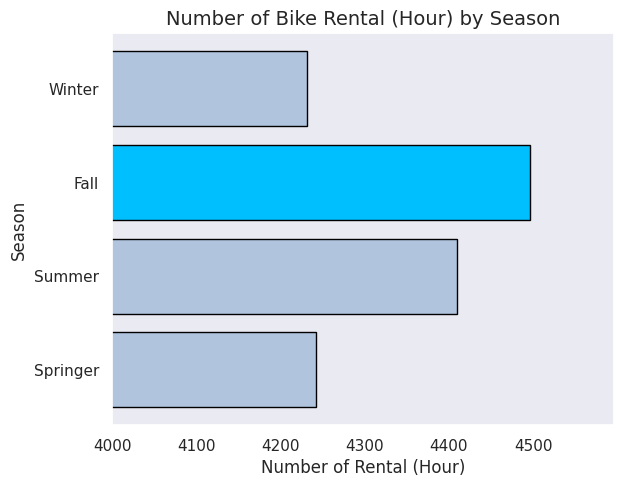

In [336]:
# Visualisasi Bar plot kolom season pada data hour
season_hour= hour_data['season'].value_counts()
season_hour = season_hour.sort_index()
bar_color = ["#B0C4DE","#B0C4DE", "#00BFFF","#B0C4DE"]
plt.barh(season_hour.index, season_hour.values, color=bar_color, edgecolor='black')

plt.xlim(4000, season_hour.max()+100)
plt.yticks(season_hour.index, ['Springer', 'Summer', 'Fall', 'Winter'])
plt.ylabel('Season')
plt.xlabel('Number of Rental (Hour)')
plt.tight_layout()
plt.title("Number of Bike Rental (Hour) by Season", loc="center", fontsize=14)
plt.show()

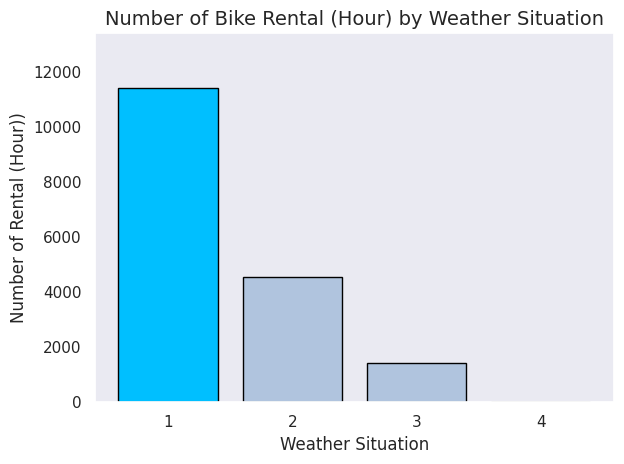

In [337]:
# Visualisasi Bar plot kolom weathersit pada data hour
weathersit_hour = hour_data['weathersit'].value_counts()
weathersit_hour = weathersit_hour.sort_index()
bar_color =  ["#00BFFF","#B0C4DE","#B0C4DE","#B0C4DE"]
plt.bar(weathersit_hour.index, weathersit_hour.values, color=bar_color, edgecolor='black' )
plt.xticks(weathersit_hour.index, ['1','2', '3', '4'])
plt.xlabel('Weather Situation')
plt.ylabel('Number of Rental (Hour))')
plt.ylim(0, weathersit_hour.max()+2000)
plt.title("Number of Bike Rental (Hour) by Weather Situation", loc="center", fontsize=14)
plt.tight_layout()
plt.show()

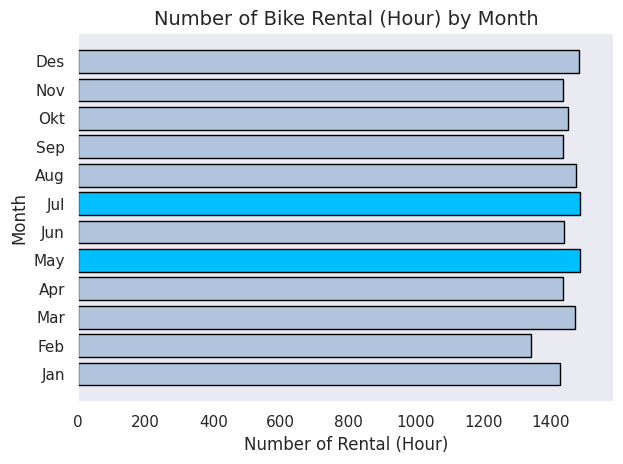

In [338]:
# Visualisasi Bar plot kolom month pada data hour
month_hour= hour_data['mnth'].value_counts()
month_hour = month_hour.sort_index()
bar_color = ["#B0C4DE","#B0C4DE","#B0C4DE", "#B0C4DE","#00BFFF", "#B0C4DE", "#00BFFF", "#B0C4DE", "#B0C4DE", "#B0C4DE","#B0C4DE","#B0C4DE"]
plt.barh(month_hour.index, month_hour.values, color=bar_color, edgecolor='black')

plt.xlim(0, month_hour.max()+100)
plt.yticks(month_hour.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'])
plt.ylabel('Month')
plt.xlabel('Number of Rental (Hour)')

plt.title("Number of Bike Rental (Hour) by Month", loc="center", fontsize=14)

plt.tight_layout()
plt.show()

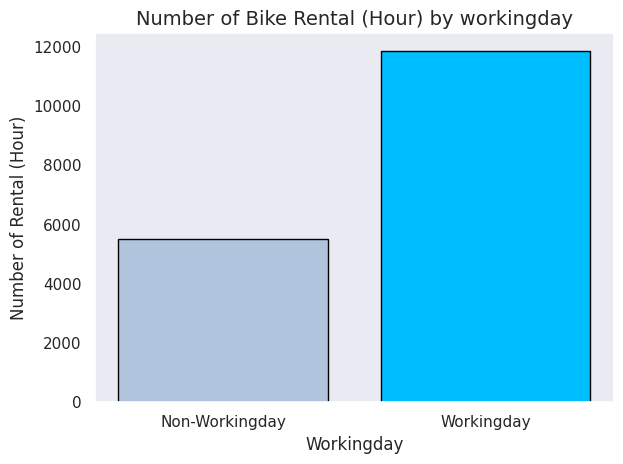

In [339]:
# Visualisasi Bar plot kolom workingday pada data hour
workingday_hour = hour_data['workingday'].value_counts()
bar_color = ["#00BFFF","#B0C4DE"]
plt.bar(workingday_hour.index, workingday_hour.values, color=bar_color, edgecolor='black')
plt.xlabel('Workingday')
plt.ylabel('Number of Rental (Hour)')
plt.xticks([0, 1], ['Non-Workingday', 'Workingday'])
plt.title("Number of Bike Rental (Hour) by workingday", loc="center", fontsize=14)
plt.tight_layout()
plt.show()

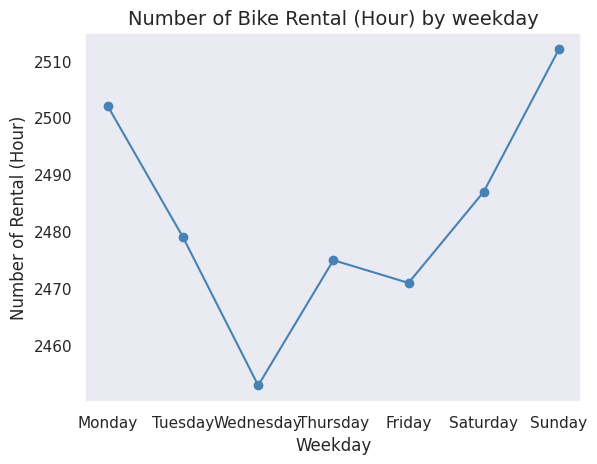

In [340]:
# Diagram garis weekday pada data hour
weekday_hour = hour_data['weekday'].value_counts().sort_index()

line_color = "#4682B4"

plt.plot(weekday_hour.index, weekday_hour, color=line_color, marker='o', linestyle='-')

plt.xlabel('Weekday')
plt.ylabel('Number of Rental (Hour)')

plt.xticks(weekday_hour.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Number of Bike Rental (Hour) by weekday", loc="center", fontsize=14)

plt.show()

**Day**

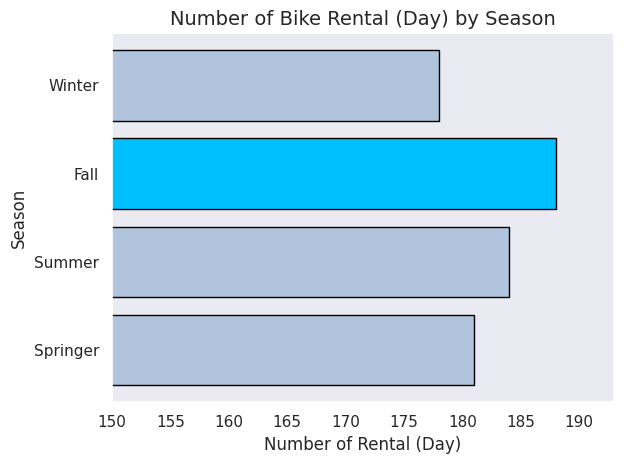

In [341]:
# Visualisasi Bar plot kolom season data day
season_day= day_data['season'].value_counts()
season_day = season_day.sort_index()
bar_color= ["#B0C4DE","#B0C4DE", "#00BFFF","#B0C4DE"]
plt.barh(season_day.index, season_day.values, color=bar_color, edgecolor='black')
plt.xlim(150, season_day.max()+5)
plt.yticks(season_day.index, ['Springer', 'Summer', 'Fall', 'Winter'])
plt.ylabel('Season')
plt.xlabel('Number of Rental (Day)')
plt.title("Number of Bike Rental (Day) by Season", loc="center", fontsize=14)

plt.tight_layout()
plt.show()

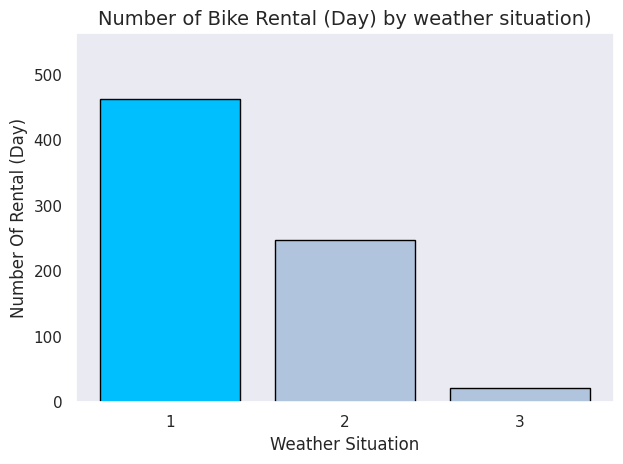

In [342]:
# Visualisasi Bar plot kolom weathersit data day
weathersit_day= day_data['weathersit'].value_counts()
weathersit_day = weathersit_day.sort_index()
bar_color = bar_color =  ["#00BFFF","#B0C4DE","#B0C4DE"]
plt.bar(weathersit_day.index, weathersit_day.values, color=bar_color, edgecolor='black')
plt.ylim(0, weathersit_day.max()+100)
plt.xticks(weathersit_day.index, ['1', '2', '3'])
plt.xlabel('Weather Situation')
plt.ylabel('Number Of Rental (Day)')
plt.title("Number of Bike Rental (Day) by weather situation)", loc="center", fontsize=14)

plt.tight_layout()
plt.show()

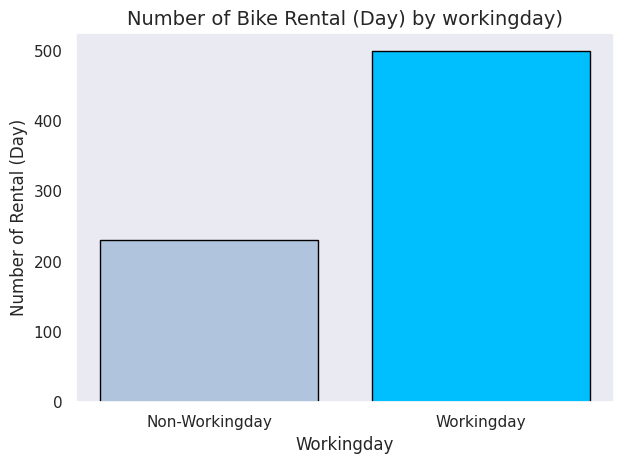

In [343]:
# Visualisasi Bar plot kolom month pada data day
workingday_day = day_data['workingday'].value_counts()
bar_color = ["#00BFFF","#B0C4DE"]
plt.bar(workingday_day.index, workingday_day.values, color=bar_color, edgecolor='black')
plt.xlabel('Workingday')
plt.ylabel('Number of Rental (Day)')
plt.xticks([0, 1], ['Non-Workingday', 'Workingday'])
plt.title("Number of Bike Rental (Day) by workingday)", loc="center", fontsize=14)

plt.tight_layout()
plt.show()

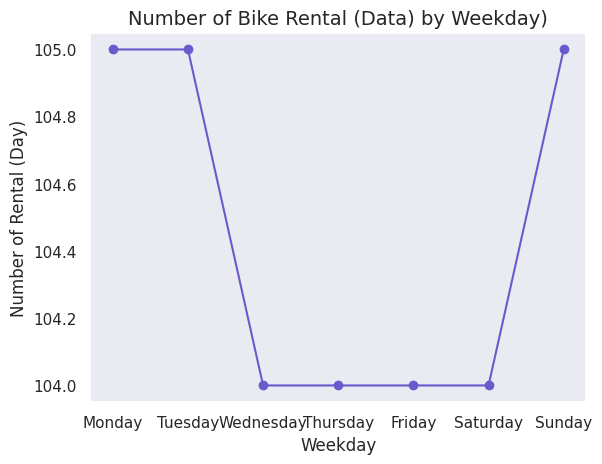

In [344]:
# Diagram garis weekday pada data day
weekday_day = day_data['weekday'].value_counts().sort_index()

line_color ="#6A5ACD"

plt.plot(weekday_day.index, weekday_day, color=line_color, marker='o', linestyle='-')

plt.xlabel('Weekday')
plt.ylabel('Number of Rental (Day)')

plt.xticks(weekday_hour.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Number of Bike Rental (Data) by Weekday)", loc="center", fontsize=14)
plt.show()

### 3. Kapan penyewa terakhir menyewa sepeda, seberapa sering dan berapa uang yang dihabiskan penyewa?

**RFM Analysis**

In [345]:
# Menghitung RFM Data Hour
rfm_hour_data = hour_data.groupby(by="registered", as_index=False).agg({
    "dteday": "max",  # Mengambil tanggal order terakhir
    "instant": "nunique",
    "cnt" : "sum"
})

# Mengganti nama kolom
rfm_hour_data.columns = ["instant", "max_rent_time", "frequency", "monetary"]

# Menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_hour_data["max_rent_time"] = pd.to_datetime(rfm_hour_data["max_rent_time"])
recent_date = rfm_hour_data["max_rent_time"].max().date()
rfm_hour_data["recency"] = rfm_hour_data["max_rent_time"].apply(lambda x: (recent_date - x.date()).days)

# Menghapus kolom 'max_order_timestamp'
rfm_hour_data.drop("max_rent_time", axis=1, inplace=True)

# Tampilkan DataFrame dengan skor RFM
print(rfm_hour_data.head())


   instant  frequency  monetary  recency
0        0         24        35       38
1        1        201       294        0
2        2        245       648        1
3        3        294      1154        0
4        4        307      1602        3


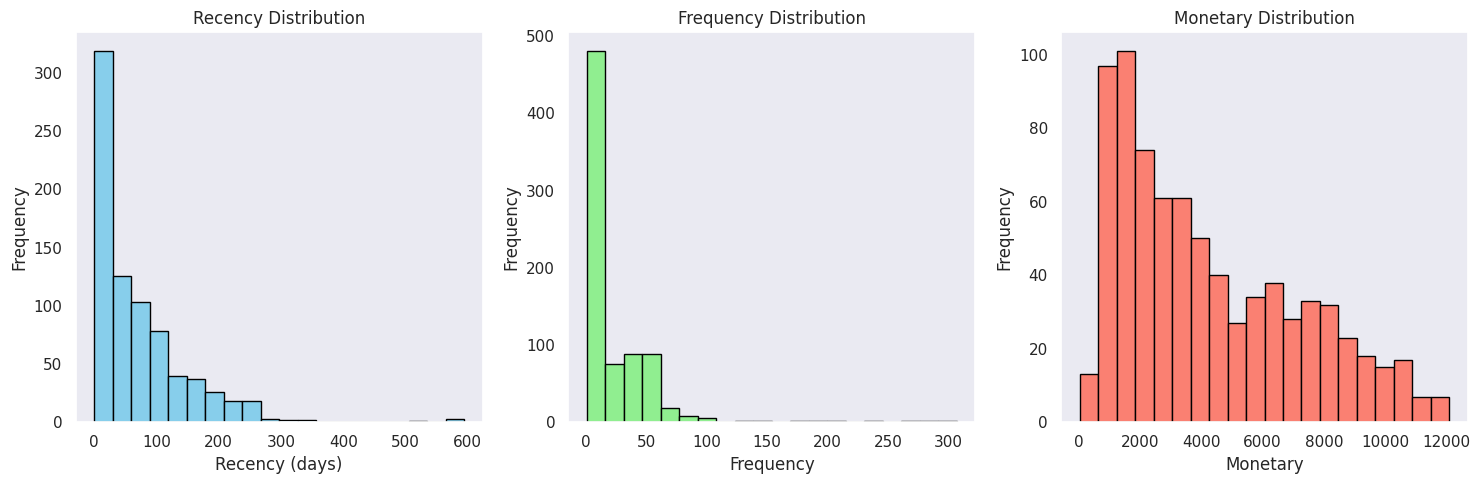

In [346]:
#Plot RFM Data Hour
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram untuk Recency
axs[0].hist(rfm_hour_data['recency'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Recency Distribution')
axs[0].set_xlabel('Recency (days)')
axs[0].set_ylabel('Frequency')


# Histogram untuk Frequency
axs[1].hist(rfm_hour_data['frequency'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title('Frequency Distribution')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Frequency')


# Histogram untuk Monetary
axs[2].hist(rfm_hour_data['monetary'], bins=20, color='salmon', edgecolor='black')
axs[2].set_title('Monetary Distribution')
axs[2].set_xlabel('Monetary')
axs[2].set_ylabel('Frequency')


# Menampilkan plot
plt.tight_layout()
plt.show()


In [347]:
# Menghitung RFM Data Hour
rfm_day_data = day_data.groupby(by="registered", as_index=False).agg({
    "dteday": "max",  # Mengambil tanggal order terakhir
    "instant":"nunique",
    "cnt" : "sum"
})

# Mengganti nama kolom
rfm_day_data.columns = ["instant", "max_rent_time", "frequency", "monetary"]

# Menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_day_data["max_rent_time"] = pd.to_datetime(rfm_day_data["max_rent_time"])
recent_date = rfm_day_data["max_rent_time"].max().date()
rfm_day_data["recency"] = rfm_day_data["max_rent_time"].apply(lambda x: (recent_date - x.date()).days)

# Menghapus kolom 'max_order_timestamp'
rfm_day_data.drop("max_rent_time", axis=1, inplace=True)

# Tampilkan DataFrame dengan skor RFM
print(rfm_day_data.head())


   instant  frequency  monetary  recency
0       20          1        22       63
1      416          1       431      704
2      432          1       441        5
3      451          1       754      372
4      472          1       506      705


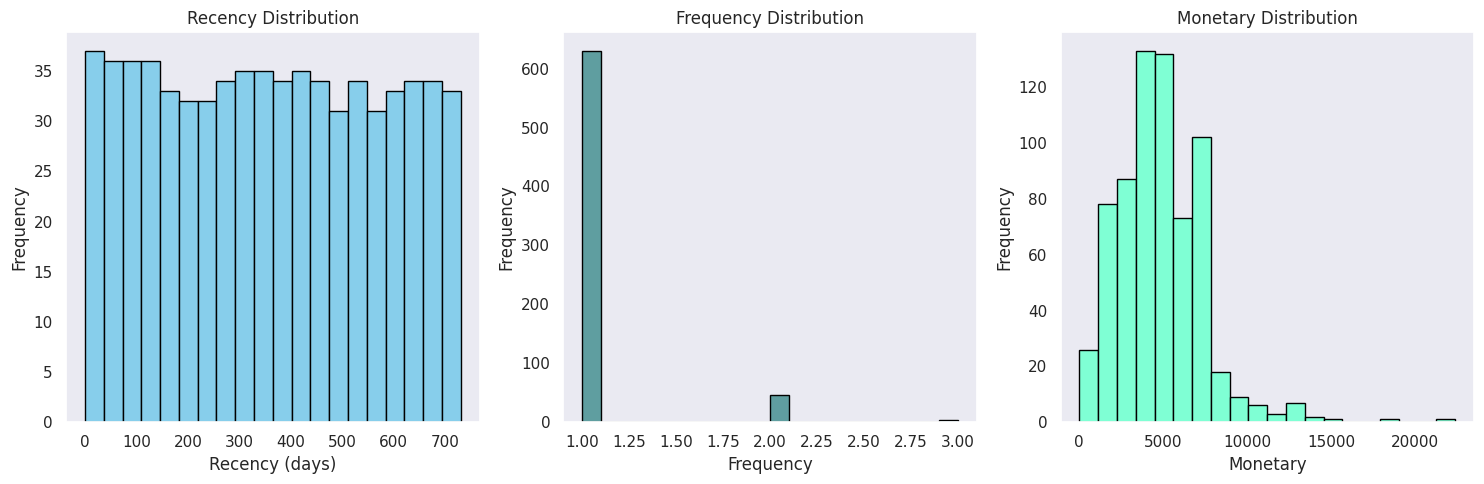

In [348]:
#Plot RFM Data Day
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram untuk Recency
axs[0].hist(rfm_day_data['recency'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Recency Distribution')
axs[0].set_xlabel('Recency (days)')
axs[0].set_ylabel('Frequency')


# Histogram untuk Frequency
axs[1].hist(rfm_day_data['frequency'], bins=20, color='cadetblue', edgecolor='black')
axs[1].set_title('Frequency Distribution')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Frequency')


# Histogram untuk Monetary
axs[2].hist(rfm_day_data['monetary'], bins=20, color='aquamarine', edgecolor='black')
axs[2].set_title('Monetary Distribution')
axs[2].set_xlabel('Monetary')
axs[2].set_ylabel('Frequency')


# Menampilkan plot
plt.tight_layout()
plt.show()

Disini bisa dilihat berapa banyak penyewaan sepeda per jam di setiap bulan di tahun 2011 dan 2012.

EDA data Hour pada kolom yr, mnth, registered, casual, cnt.

## Conclusion

**Conslusion Pertanyaan 1**
- Terlihat pada 6 bulan terakhir di 2012, performa penyewaan harian sepeda paling tinggi pada bulan juli dan aguatus untuk bulan selanjutnya penyewaan turun, hingga di bulan oktober mencapai titik penyewaan terendah selama 6 bulan terakhir, untuk bulan selanjutnya november, penyewaan naik performanya, dan kembali tinggi di bulan desember (jumlah pnyewaan hampir sama dengan juli, agustus).

**Conclusion pertanyaan 2**


- Berdasarka EDA dan Visualisasi Data terlihat bahwa faktor yang paling mempengaruhi penyewaan sepeda baik per jam dan perharinya yaitu weathersit (kondisi cuaca).
Pada penyewaan harian season (musim) cukup berpengaruh.
weekday dan month (bulan) tidak terlalu berpengaruh signifikan pada penyewaan sepeda harian.
Pada penyewaan sepeda harian month dan weekday tidak berpengaruh.

**Conclusion pertanyaan 3**
- Berdasarkan RFM Analysis pada Data Hour
- Segmen 0: memiliki frekuensi yang cukup tinggi (24), tetapi nilai moneter (35) dan recency (38) yang rendah. Terdiri dari pelanggan yang sering menyewa, tetapi dengan nilai transaksi yang rendah dan penyewaan terakhir terakhir sudah lama.

- Segmen 1: memiliki frekuensi yang cukup tinggi (201) dengan nilai moneter (294) yang lebih tinggi, dan recency (0) yang menunjukkan interaksi terakhir yang baru. Terdiri dari pelanggan yang aktif secara teratur dan memberikan kontribusi yang signifikan terhadap pendapatan.

- Segmen 2: Memiliki frekuensi (245) dan nilai moneter (648) yang tinggi, dengan recency (1) yang menunjukkan penyewaan terakhir yang baru, terdiri dari pelanggan yang sangat bepengaruh dan aktif secara teratur.

- Segmen 3: Segmen ini memiliki frekuensi (294) dan nilai moneter (1154) yang tinggi, meskipun recency (0) menunjukkan penyewaan terakhir yang baru. Ini juga terdiri dari pelanggan yang sangat berpengaruh dan aktif secara teratur, tetapi lebih baru daripada segmen 2.

- Segmen 4: memiliki frekuensi (307) dan nilai moneter (1602) yang sangat tinggi, dengan recency (3) yang menunjukkan penyewaan terakhir yang cukup baru. Mrupakan segmen paling berpengaruh dengan pelanggan yang sangat aktif dan memberikan kontribusi yang signifikan terhadap pendapatan.